<a href="https://colab.research.google.com/github/maha-rw/Handwritten-Digits-Recognition-in-Both-Arabic-and-English/blob/main/Handwritten_Digits_Recognition_Model_2___RandomForest_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Handwritten Digits Recognition - Model #2 : Random Forest**

##**Notebook Introduction**
*  This notebook aims to utilize a neural network for the task of recognizing handwritten digits. The objective of this project is to develop a machine learning model that can accurately classify images of handwritten digits into their respective numeric values.


*  This notebook is divided into two main sections:
   1.   Arabic Dataset
   2.   English Dataset



*  both datasets have identical code in hyperparameter tuning but differ in loading the data due to different conditions of datsets files.


*  To run the desired dataset, execute the section dedicated to it.





*   **Used Technique**



In this notebook we are going to implement the random forest model which is an ensemble of decision trees. It combines predictions from multiple trees to make accurate predictions. It uses random sampling and random feature selection to introduce diversity and reduce overfitting.

##**import relevent modules**

In [ ]:
from google.colab import drive
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.metrics import classification_report, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


#**Dataset 1: Arabic Dataset**

**Loading the data**

In [ ]:
drive.mount('/content/drive')
X_train = pd.read_csv("/content/drive/MyDrive/Handwritten Digits Recognition Project/Group4-Datasets/csvTrainImages 60k x 784.csv").values
Y_train = pd.read_csv("/content/drive/MyDrive/Handwritten Digits Recognition Project/Group4-Datasets/csvTrainLabel 60k x 1.csv").values
X_test = pd.read_csv("/content/drive/MyDrive/Handwritten Digits Recognition Project/Group4-Datasets/csvTestImages 10k x 784.csv").values
Y_test = pd.read_csv("/content/drive/MyDrive/Handwritten Digits Recognition Project/Group4-Datasets/csvTestLabel 10k x 1.csv").values
print (X_train.shape )
print (Y_train.shape)

Mounted at /content/drive
(59999, 784)
(59999, 1)


We need to normalize the pixel values of the images to a range between 0 and 1. To achieve this, we divide the pixel values by 255, which is the maximum pixel value. Normalization is necessary to ensure that all pixel values are within a consistent and standardized range. This helps the model learn more effectively and improves convergence during training.

In [ ]:
# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Print the shapes of the datasets
print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Train set shape: (59999, 784)
Test set shape: (9999, 784)


**Define the hyperparameters to tune**

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, 20],
}

**Create a Random Forest classifier**

In [ ]:
rf_classifier = RandomForestClassifier(random_state=42)

**Perform grid search to find the best hyperparameters**

In [ ]:
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Best Hyperparameters:
{'max_depth': 20, 'n_estimators': 300}


**Create a new Random Forest classifier with the best hyperparameters**

In [ ]:
best_rf_classifier = RandomForestClassifier(random_state=42, **best_params)

**Train the model with the best hyperparameters and make predictions on the test set**

In [ ]:
best_rf_classifier.fit(X_train, Y_train)
y_pred = best_rf_classifier.predict(X_test)

<ipython-input-11-f71dcd2b55bb>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_rf_classifier.fit(X_train, Y_train)


**Evaluate the model**

In [ ]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       999
           1       0.99      0.98      0.99      1000
           2       0.97      0.98      0.97      1000
           3       0.99      0.97      0.98      1000
           4       0.99      0.98      0.98      1000
           5       0.98      0.98      0.98      1000
           6       0.99      0.99      0.99      1000
           7       1.00      0.99      0.99      1000
           8       0.99      0.99      0.99      1000
           9       0.98      0.99      0.98      1000

    accuracy                           0.98      9999
   macro avg       0.98      0.98      0.98      9999
weighted avg       0.98      0.98      0.98      9999



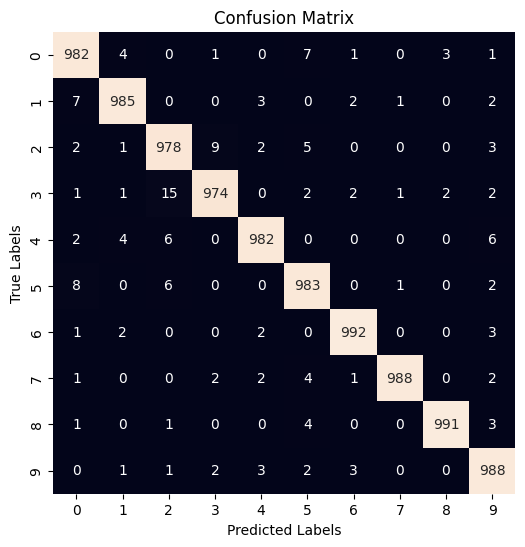

In [ ]:
# Calculate and plot the confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred)

# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Get the top 10 results
results = grid_search.cv_results_
top_results_indices = results['mean_test_score'].argsort()[-10:][::-1]
top_results = [results['mean_test_score'][i] for i in top_results_indices]
top_params = [results['params'][i] for i in top_results_indices]

# Print the top 10 accuracy, precision, and recall results
print("Top 10 Evaluation Results:")
for score, params in zip(top_results, top_params):
    print(f"Accuracy: {score:.4f} | Parameters: {params}")

Top 10 Evaluation Results:
Accuracy: 0.9858 | Parameters: {'max_depth': 20, 'n_estimators': 300}
Accuracy: 0.9857 | Parameters: {'max_depth': 20, 'n_estimators': 200}
Accuracy: 0.9853 | Parameters: {'max_depth': 20, 'n_estimators': 100}
Accuracy: 0.9844 | Parameters: {'max_depth': 15, 'n_estimators': 300}
Accuracy: 0.9843 | Parameters: {'max_depth': 15, 'n_estimators': 200}
Accuracy: 0.9841 | Parameters: {'max_depth': 15, 'n_estimators': 100}
Accuracy: 0.9766 | Parameters: {'max_depth': 10, 'n_estimators': 300}
Accuracy: 0.9764 | Parameters: {'max_depth': 10, 'n_estimators': 200}
Accuracy: 0.9762 | Parameters: {'max_depth': 10, 'n_estimators': 100}
Accuracy: 0.9317 | Parameters: {'max_depth': 5, 'n_estimators': 200}


In [ ]:
print("Best Hyperparameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")

Best Hyperparameters:
max_depth: 20
n_estimators: 300


In [ ]:
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9843984398439845


#**Dataset 2: English Dataset**

**Loading the data**

In [ ]:
# Load the data from CSV files
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/Handwritten Digits Recognition Project/Group4-Datasets/E-train.csv')
print (data.shape ) #(42000, 785)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(41995, 785)


We need to normalize the pixel values of the images to a range between 0 and 1. To achieve this, we divide the pixel values by 255, which is the maximum pixel value. Normalization is necessary to ensure that all pixel values are within a consistent and standardized range. This helps the model learn more effectively and improves convergence during training.

In [ ]:
X = data.drop('label', axis=1)  # Features (input)
y = data['label']  # Labels (output)

# Normalize the image data by dividing by 255
X_normalized = X / 255.0

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Define the hyperparameters to tune**

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, 20],
}

**Create a Random Forest classifier**

In [ ]:
rf_classifier = RandomForestClassifier(random_state=42)

**Perform grid search to find the best hyperparameters**

In [ ]:
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(grid_search.best_params_)

Best Hyperparameters:
{'max_depth': 20, 'n_estimators': 300}


**Create a new Random Forest classifier with the best hyperparameters**

In [ ]:
best_rf_classifier = RandomForestClassifier(random_state=42, **best_params)

**Train the model with the best hyperparameters and make predictions on the test set**

In [ ]:
best_rf_classifier.fit(X_train, y_train)
y_pred = best_rf_classifier.predict(X_test)

In [ ]:
print("Best Hyperparameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")

Best Hyperparameters:
max_depth: 20
n_estimators: 300


**Evaluate the model**

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       816
           1       0.98      0.99      0.99       909
           2       0.97      0.97      0.97       846
           3       0.96      0.94      0.95       937
           4       0.96      0.97      0.97       839
           5       0.97      0.96      0.96       702
           6       0.97      0.98      0.97       785
           7       0.97      0.95      0.96       893
           8       0.96      0.96      0.96       835
           9       0.93      0.94      0.94       838

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400



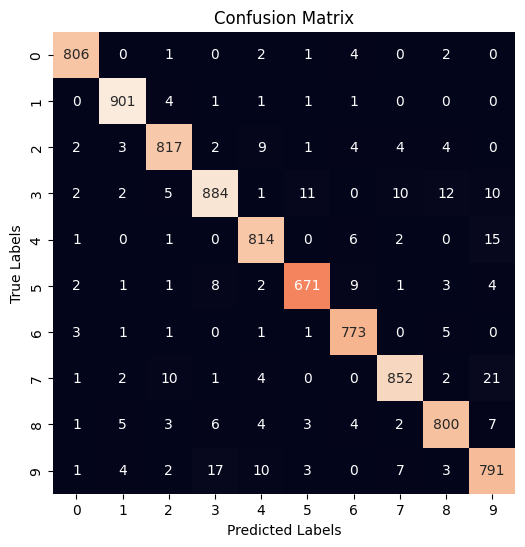

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Get the top 10 results
results = grid_search.cv_results_
top_results_indices = results['mean_test_score'].argsort()[-10:][::-1]
top_results = [results['mean_test_score'][i] for i in top_results_indices]
top_params = [results['params'][i] for i in top_results_indices]

# Print the top 10 accuracy, precision, and recall results
print("Top 10 Evaluation Results:")
for score, params in zip(top_results, top_params):
    print(f"Accuracy: {score:.4f} | Parameters: {params}")

Top 10 Evaluation Results:
Accuracy: 0.9634 | Parameters: {'max_depth': 20, 'n_estimators': 300}
Accuracy: 0.9624 | Parameters: {'max_depth': 20, 'n_estimators': 200}
Accuracy: 0.9615 | Parameters: {'max_depth': 20, 'n_estimators': 100}
Accuracy: 0.9607 | Parameters: {'max_depth': 15, 'n_estimators': 200}
Accuracy: 0.9604 | Parameters: {'max_depth': 15, 'n_estimators': 300}
Accuracy: 0.9586 | Parameters: {'max_depth': 15, 'n_estimators': 100}
Accuracy: 0.9441 | Parameters: {'max_depth': 10, 'n_estimators': 200}
Accuracy: 0.9441 | Parameters: {'max_depth': 10, 'n_estimators': 300}
Accuracy: 0.9432 | Parameters: {'max_depth': 10, 'n_estimators': 100}
Accuracy: 0.8604 | Parameters: {'max_depth': 5, 'n_estimators': 300}


We can see from the result that the Arabic dataset is performing better

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9653571428571428


It is evident that the Arabic dataset demonstrates higher accuracy, indicating its superior performance.

In conclusion, the results clearly demonstrate that the Arabic dataset outperforms the English dataset in terms of performance.